<a href="https://colab.research.google.com/github/mohit-bags/Arrhythmia-Detection/blob/main/Arrythmia_3_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install neurokit2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from os import listdir 
import requests
import neurokit2 as nk
import matplotlib.pyplot as plt
from os import listdir, mkdir, system
from os.path import isfile, isdir, join, exists
import json
import os
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (15,5)


In [ ]:
# url = 'https://figshare.com/ndownloader/files/15651296'
# r = requests.get(url, allow_redirects=True)
# open('RhythmNames.xlsx', 'wb').write(r.content)

8756

In [ ]:
# url='https://figshare.com/ndownloader/files/15653771'
# r = requests.get(url, allow_redirects=True)
# open('Diagnostics.xlsx', 'wb').write(r.content)

975796

In [ ]:
# url='https://figshare.com/ndownloader/files/15652862'
# r = requests.get(url, allow_redirects=True)
# print(r.headers.get('content-type'))
# open('ECGDataDenoised.zip', 'wb').write(r.content)
!unzip /content/drive/"My Drive"/"Arrythmia "/ECGDataDenoised.zip

In [ ]:
labels = pd.read_excel('/content/drive/MyDrive/Arrythmia /Diagnostics.xlsx')

In [ ]:
labels=labels[(labels['Rhythm']=='AFIB') | (labels['Rhythm']=='AF') |(labels['Rhythm']=='SR')]
labels.reset_index(inplace=True,drop=True)

In [ ]:
labels['Rhythm'].value_counts()

SR      1826
AFIB    1780
AF       445
Name: Rhythm, dtype: int64

In [ ]:
labels

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
2,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
3,MUSE_20180209_172046_21000,SR,NONE,46,MALE,63,63,90,376,384,24,38,11,221,266,409
4,MUSE_20180113_133901_16000,AFIB,STTC,67,FEMALE,72,65,90,416,455,-1,-15,12,228,273,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,MUSE_20180210_123100_20000,SR,TWC,57,FEMALE,68,68,96,400,425,18,60,11,210,258,410
4047,MUSE_20180115_131040_20000,AFIB,TWC,81,FEMALE,70,63,90,566,611,74,-70,12,221,266,504
4048,MUSE_20180209_132228_29000,SR,NONE,71,FEMALE,90,90,68,360,440,70,48,15,226,260,406
4049,MUSE_20180116_170450_55000,AFIB,LVQRSLL RBBB,74,MALE,75,80,134,402,448,178,6,13,197,264,398


In [ ]:
afib_files = labels[labels['Rhythm']=="AFIB"]['FileName'].tolist()
nsr_files = labels[labels['Rhythm']=="SR"]['FileName'].tolist()
afl_files = labels[labels['Rhythm']=="AF"]['FileName'].tolist()

In [ ]:
print(len(afib_files),len(nsr_files),len(afl_files))

1780 1826 445


In [ ]:
afib_files[0]

'MUSE_20180113_171327_27000'

In [ ]:

def detect_r_peaks(patient_list):
    parent_folder = '/content/ECGDataDenoised/'
    total_r_peaks=0
    for i in tqdm(patient_list):
      try:
        data = parent_folder+i+".csv"
        
        df = pd.read_csv(data,header=None)
        df.columns=['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']
        
        cols = df.columns
        df[cols[:-1]] = df[cols[:-1]].apply(pd.to_numeric, errors='coerce') 

        # Extract R-peaks locations
        _, rpeaks = nk.ecg_peaks(df["aVL"][1:], sampling_rate=500)

        # Visualize R-peaks in ECG signal
        # plot = (nk.events_plot(rpeaks['ECG_R_Peaks'], df["aVL"]))
        total_r_peaks+=len(rpeaks['ECG_R_Peaks'])
      except:
        print("\nError in:",i)
    print("\n")
    return total_r_peaks#number of peaks

In [ ]:
print(len(afib_files))
afib_r_peaks=detect_r_peaks(afib_files)
print(afib_r_peaks)

1780


 14%|█▎        | 244/1780 [00:05<00:30, 50.64it/s]


Error in: MUSE_20180712_160855_39000


100%|██████████| 1780/1780 [00:36<00:00, 48.42it/s]



26772


In [ ]:
print(len(afl_files))
afl_r_peaks=detect_r_peaks(afl_files)
print(afl_r_peaks)

445


 75%|███████▌  | 334/445 [00:06<00:02, 51.50it/s]


Error in: MUSE_20180112_134829_78000


100%|██████████| 445/445 [00:09<00:00, 48.17it/s]



7887


In [ ]:
print(len(nsr_files))
nsr_r_peaks=detect_r_peaks(nsr_files)
print(nsr_r_peaks)

1826


 69%|██████▉   | 1266/1826 [00:25<00:10, 53.38it/s]


Error in: MUSE_20180210_125924_43000


100%|██████████| 1826/1826 [00:36<00:00, 50.03it/s]



22320


In [ ]:
print(nsr_r_peaks+afl_r_peaks+afib_r_peaks)

56979


In [ ]:
parent_folder="/content/ECGDataDenoised/"
file=parent_folder+"MUSE_20180712_160855_39000"+".csv"
tmp = pd.read_csv(file,header=None)
tmp.columns=['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']

In [ ]:
tmp

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,145.9800,-34.0340,-178.2400,-58.8020,128.9800,-116.56000,-49.3530,-5.98940,0.23611,1.0709,29.1010,13.170
1,95.0550,-1.3568,-94.7680,-49.3060,62.2900,-58.16400,-51.4070,-2.48620,6.14600,1.0735,31.5960,15.914
2,37.9910,28.9100,-7.5632,-35.5380,-9.3041,0.85385,-50.9620,1.98100,12.25000,2.4676,34.8210,19.284
3,-23.4680,53.4350,78.2960,-16.7340,-82.3570,56.28300,-47.2490,7.23170,18.02600,5.6390,38.7490,23.206
4,-78.7810,68.3490,148.4000,3.6971,-144.3900,99.01900,-41.6250,11.82600,22.21200,9.8211,42.5130,26.798
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,13.9890,-8.7132,-42.9320,1.4611,31.4650,-26.41000,11.5120,-43.49200,-30.67900,-38.5160,-43.0820,-46.412
4996,9.5065,-9.7364,-39.5690,4.4890,27.5830,-25.26100,8.6298,-39.23500,-26.20600,-34.4730,-39.5110,-42.472
4997,-15.7970,-15.5570,-20.1830,20.4600,5.5065,-18.69300,5.9772,-29.45500,-17.75700,-26.4700,-31.8940,-34.061
4998,-57.6750,-25.3490,11.8060,46.8380,-30.9440,-7.99060,3.6526,-15.51900,-6.43290,-15.5940,-21.4200,-22.828


In [ ]:

df=tmp.copy()
cols = df.columns
df[cols[:-1]] = df[cols[:-1]].apply(pd.to_numeric, errors='coerce') 
df.reset_index(inplace=True,drop=True)

# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(df["aVL"][2:], sampling_rate=500)
print("No. of R peaks:",len(rpeaks['ECG_R_Peaks']))
# Visualize R-peaks in ECG signal
plot = (nk.events_plot(rpeaks['ECG_R_Peaks'], df["aVL"]))

IndexError: ignored

In [ ]:
rpeaks

{'ECG_R_Peaks': array([ 246,  481,  746,  981, 1259, 1525, 1820, 2089, 2351, 2586, 2872,
        3135, 3405, 3694, 3865, 4083, 4357, 4597, 4859]), 'sampling_rate': 500}

In [ ]:
afib_files

0       MUSE_20180113_171327_27000
2       MUSE_20180114_075026_69000
4       MUSE_20180113_133901_16000
6       MUSE_20180116_123940_90000
8       MUSE_20180114_075003_61000
                   ...            
4043    MUSE_20180116_120939_86000
4044    MUSE_20180114_134126_54000
4047    MUSE_20180115_131040_20000
4049    MUSE_20180116_170450_55000
4050    MUSE_20180115_131524_93000
Name: FileName, Length: 1780, dtype: object

In [115]:
all_subjects= afib_files+ nsr_files + afl_files

In [119]:
subject_label = {}
for i in afib_files:
    subject_label[i] = 'afib'
for i in nsr_files:
    subject_label[i] = 'nsr'
for i in afl_files:
    subject_label[i] = 'afl'

No. of R peaks: 19


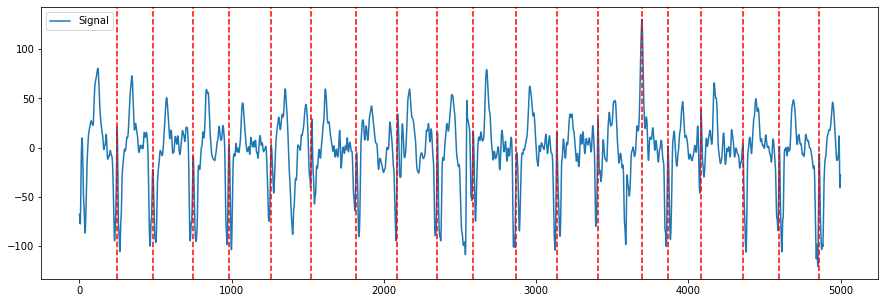

In [ ]:
parent_folder="/content/ECGDataDenoised/"
file_name=parent_folder+afib_files[0]+".csv"
df = pd.read_csv(file_name,header=None)
df.columns=['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']
cols = df.columns
df[cols[:-1]] = df[cols[:-1]].apply(pd.to_numeric, errors='coerce') 
df.reset_index(inplace=True,drop=True)

# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(df["aVL"][2:], sampling_rate=500)
print("No. of R peaks:",len(rpeaks['ECG_R_Peaks']))
# Visualize R-peaks in ECG signal
plot = (nk.events_plot(rpeaks['ECG_R_Peaks'], df["aVL"]))

In [ ]:
_

,ECG_R_Peaks
0,0
1,0
2,0
3,0
4,0
...,...
4993,0
4994,0
4995,0
4996,0


In [ ]:
subject_label = {}
for i in afib_files:
    subject_label[i] = 'afib'
for i in nsr_files:
    subject_label[i] = 'nsr'
for i in afl_files:
    subject_label[i] = 'afl'

In [123]:
len(afl_files)

445

In [137]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
# data = array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15])
data=all_subjects
# prepare cross validation
kfold = KFold(10,shuffle=True,random_state=42)
# enumerate splits
for train, test in kfold.split(data):
	# print('train: %s, test: %s' % (train, test))
  
  cnt_train={}
  for i in train:
    label=subject_label[all_subjects[i]]
    if label in cnt_train:
      cnt_train[label]+=1
    else:
      cnt_train[label]=1
  print("Train:",cnt_train)

  cnt_test={}
  for i in test:
    label=subject_label[all_subjects[i]]
    if label in cnt_test:
      cnt_test[label]+=1
    else:
      cnt_test[label]=1
  print("Test:",cnt_test)


Train: {'afib': 1593, 'nsr': 1645, 'afl': 407}
Test: {'afib': 187, 'nsr': 181, 'afl': 38}
Train: {'afib': 1587, 'nsr': 1654, 'afl': 405}
Test: {'afib': 193, 'nsr': 172, 'afl': 40}
Train: {'afib': 1599, 'nsr': 1644, 'afl': 403}
Test: {'afib': 181, 'nsr': 182, 'afl': 42}
Train: {'afib': 1602, 'nsr': 1650, 'afl': 394}
Test: {'afib': 178, 'nsr': 176, 'afl': 51}
Train: {'afib': 1612, 'nsr': 1638, 'afl': 396}
Test: {'afib': 168, 'nsr': 188, 'afl': 49}
Train: {'afib': 1603, 'nsr': 1640, 'afl': 403}
Test: {'afib': 177, 'nsr': 186, 'afl': 42}
Train: {'afib': 1610, 'nsr': 1638, 'afl': 398}
Test: {'afib': 170, 'nsr': 188, 'afl': 47}
Train: {'afib': 1598, 'nsr': 1635, 'afl': 413}
Test: {'afib': 182, 'nsr': 191, 'afl': 32}
Train: {'afib': 1607, 'nsr': 1648, 'afl': 391}
Test: {'afib': 173, 'nsr': 178, 'afl': 54}
Train: {'afib': 1609, 'nsr': 1642, 'afl': 395}
Test: {'afib': 171, 'nsr': 184, 'afl': 50}


In [112]:
len(train

1602

In [114]:
len(test)*100/1780

10.0